In [1]:
#导入模块
import pandas as pd
from pandas.io.json import json_normalize
import json
import requests

In [2]:
CYY = "2bf18682847eba84262e9eb3242b82bf" #定义KEY值

可以在高德看看json的层次

###  1.地理编码

In [5]:
url = 'https://restapi.amap.com/v3/geocode/geo?parameters'

def geocode(address,city=None,batch=None,sig=None)->dict: # 指定它为字典 位置参数写必填的东西（如address）
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': CYY,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
牌坊公园 = geocode(address='肇庆市牌坊公园',city='肇庆市')
print(牌坊公园)
df_牌坊公园地理编码 = json_normalize(牌坊公园['geocodes'])
display(df_牌坊公园地理编码)
牌坊公园地理编码 = 牌坊公园['geocodes'][0]['location']
print("一中地理编码:",牌坊公园地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省肇庆市端州区牌坊公园', 'country': '中国', 'province': '广东省', 'citycode': '0758', 'city': '肇庆市', 'district': '端州区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '441202', 'street': [], 'number': [], 'location': '112.470984,23.060107', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省肇庆市端州区牌坊公园,中国,广东省,0758,肇庆市,端州区,[],441202,[],[],"112.470984,23.060107",兴趣点,[],[],[],[]


一中地理编码: 112.470984,23.060107


### 2.逆地理编码 

In [6]:
def regeocode(location,poitype=None,radius=None,extensions="all",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': CYY,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    
    response = requests.get(url,params=params)
    data = response.json()
    return data

牌坊公园逆地理编码_base = regeocode(牌坊公园地理编码)
print(牌坊公园逆地理编码_base)
df_牌坊公园逆地理编码 = json_normalize(牌坊公园逆地理编码_base).T
display(df_牌坊公园逆地理编码)

{'status': '1', 'regeocode': {'roads': [{'id': '0758F49F012036605680', 'location': '112.472,23.06', 'direction': '西', 'name': '莲湖西路', 'distance': '108.39'}, {'id': '0758F49F01203646074', 'location': '112.469,23.0602', 'direction': '东', 'name': '中心堤', 'distance': '165.114'}, {'id': '0758F49F01203646238', 'location': '112.473,23.0578', 'direction': '西北', 'name': '文明路', 'distance': '301.092'}], 'roadinters': [{'second_name': '莲湖中路二街', 'first_id': '0758F49F012036442', 'second_id': '0758F49F0120365301', 'location': '112.4751161,23.05926917', 'distance': '432.93', 'first_name': '莲湖中路', 'direction': '西'}], 'formatted_address': '广东省肇庆市端州区端州区城东街道牌坊公园七星岩景区', 'addressComponent': {'city': '肇庆市', 'province': '广东省', 'adcode': '441202', 'district': '端州区', 'towncode': '441202001000', 'streetNumber': {'number': 'a栋', 'location': '112.473284,23.0588311', 'direction': '东南', 'distance': '274.783', 'street': '莲湖西路'}, 'country': '中国', 'township': '端州区城东街道', 'businessAreas': [[]], 'building': {'name': [], 't

,0
status,1
info,OK
infocode,10000
regeocode.roads,"[{'id': '0758F49F012036605680', 'location': '1..."
regeocode.roadinters,"[{'second_name': '莲湖中路二街', 'first_id': '0758F4..."
regeocode.formatted_address,广东省肇庆市端州区端州区城东街道牌坊公园七星岩景区
regeocode.addressComponent.city,肇庆市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,441202
regeocode.addressComponent.district,端州区


### 3.路径规划 

In [204]:
# 基本信息
def way(origin,destination,sig=None)->dict:
    
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key': CYY,
        'origin': origin,
        'destination': destination,
        'output': 'json'
    }
    
    response = requests.get(url,params=params)
    data = response.json()
    return data

# 设置两个点
大润发= geocode('肇庆市端州区城北街道端州四路10号')
大润发_location = 大润发['geocodes'][0]['location']
印象汇 = geocode('肇庆市端州区端州四路8号')
印象汇_location = 印象汇['geocodes'][0]['location']

# 开始规划路线
印象汇_大润发 = way(大润发_location,印象汇_location)
印象汇_大润发

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '112.472820,23.056454',
  'destination': '112.473991,23.056569',
  'paths': [{'distance': '286',
    'duration': '229',
    'steps': [{'instruction': '向东南步行69米向左前方行走',
      'orientation': '东南',
      'road': [],
      'distance': '69',
      'duration': '55',
      'polyline': '112.47296,23.056506;112.47319,23.055994;112.47319,23.055994;112.473251,23.056016',
      'action': '向左前方行走',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿文明路向南步行57米左转',
      'orientation': '南',
      'road': '文明路',
      'distance': '57',
      'duration': '46',
      'polyline': '112.473251,23.056016;112.473372,23.055712;112.473372,23.055712;112.473411,23.055616;112.473411,23.055616;112.473446,23.055525',
      'action': '左转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿端州四路向东北步行113米左转',
      'orientation': '东北',
      'road': '端州四路',
      'distance': '1

大润发_location:112.472820,23.056454
印象汇_location:112.473991,23.056569

walk_type都是=0，但现实路径中要过地下人行道，可能有点不准确或者是绕了远路。

### 4.行政区域查询

In [73]:
def region(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':CYY,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = region(keywords='广东',extensions='all',subdistrict=2)
行政区域

df_行政区域_1级 = json_normalize(行政区域["districts"][0]['districts'])
df_行政区域_1级
df_行政区域_2级_肇庆市 = json_normalize(行政区域["districts"][0]['districts'][0]['districts'])
display(df_行政区域_1级,df_行政区域_2级_肇庆市)# --->同时print

,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


,citycode,adcode,name,center,level,districts
0,0758,441224,怀集县,"112.182466,23.913072",district,[]
1,0758,441223,广宁县,"112.440419,23.631486",district,[]
2,0758,441225,封开县,"111.502973,23.434731",district,[]
3,0758,441284,四会市,"112.695028,23.340324",district,[]
4,0758,441226,德庆县,"111.78156,23.141711",district,[]
5,0758,441203,鼎湖区,"112.565249,23.155822",district,[]
6,0758,441202,端州区,"112.472329,23.052662",district,[]
7,0758,441204,高要区,"112.460846,23.027694",district,[]


### 5.搜索POI 

In [74]:
def POI(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None,)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':CYY,
        'keywords':keywords,
        'types':types,
        'city': city,
        'citylimit':citylimit,
        'children':children, 
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

肯德基 = POI('肯德基','肯德基','肇庆市',children=1,extensions='all')
肯德基

{'status': '1',
 'count': '15',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFLKC8XJ',
   'parent': [],
   'childtype': [],
   'name': '肯德基(肇庆新市一院店)',
   'tag': [],
   'type': '餐饮服务;快餐厅;肯德基',
   'typecode': '050301',
   'biz_type': 'diner',
   'address': '东岗东路新市一医院门诊部公交站对面',
   'location': '112.509787,23.094493',
   'tel': [],
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0758',
   'cityname': '肇庆市',
   'adcode': '441202',
   'adname': '端州区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3412541012',
   'distance': [],
   'navi_poiid': [],
   'entr_location': [],
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-02-21 16:40:45',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], 'truefloor': [], 'cmsid': []},
   'groupbuy_num': '

In [97]:
df_KFC =  json_normalize(肯德基["pois"])
df_KFC
df_益华肯德基 =  json_normalize(肯德基["pois"][1])
df_益华肯德基
display(df_KFC,df_益华肯德基)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFLKC8XJ,[],[],肯德基(肇庆新市一院店),[],餐饮服务;快餐厅;肯德基,050301,diner,东岗东路新市一医院门诊部公交站对面,"112.509787,23.094493",...,[],[],[],[],[],[],[],[],[],0
1,B0FFITNV9D,[],[],肯德基(益华国际广场店),"金沙咸蛋黄香辣鸡翅,新奥尔良烤翅,原味甜筒,五味小食拼盘,原味吮指鸡,香辣鸡腿堡,蛋挞,中薯...",餐饮服务;快餐厅;肯德基,050301,diner,益华广场东侧,"112.502398,23.068238",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,25.00,0
2,B0FFG88X2M,B0FFF5ASN7,202,肯德基(海伦城市广场店),"香辣鸡翅,中薯,蛋挞,原味吮指鸡,老北京鸡肉卷,醇香土豆泥,吮指十三鲜小龙虾烤鸡堡,/鸡肉卷...",餐饮服务;快餐厅;肯德基,050301,diner,东城街道清塘大道二十三座8号(首层店)s03铺海伦城市广场,"112.703703,23.346688",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,30.00,0
3,B0FFG2L7RP,[],[],肯德基(金利新时代DT店),"超值全家桶,新奥尔良烤翅,香辣鸡翅,金沙咸蛋黄香辣鸡翅,中薯,原味吮指鸡,老北京鸡肉卷,新奥...",餐饮服务;快餐厅;肯德基,050301,diner,金利镇金龙大道新时代购物广场1层,"112.772736,23.086466",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,29.00,0
4,B02F60OS5D,B02F60PN17,202,肯德基(大旺店),"泰式香辣烤翅,蛋挞,香辣鸡腿堡,黑椒鸡块,五味小食拼盘,中薯,老北京鸡肉卷,新奥尔良腿堡,薯...",餐饮服务;快餐厅;肯德基,050301,diner,政德大街金凤凰广场,"112.813758,23.297817",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,22.00,0
5,B02F60OS5C,[],[],肯德基(德庆店),"薯条,香辣鸡翅,香辣鸡腿堡,蛋挞,中薯,原味吮指鸡,金沙咸蛋黄香辣鸡翅,黄金鸡块,新奥尔良烤...",餐饮服务;快餐厅;肯德基,050301,diner,龙母大街锦龙国际酒店1层,"111.779362,23.142942",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,32.00,0
6,B02F60OID5,[],[],肯德基(怀集店),"香辣鸡翅,超值全家桶,炸鸡,薯条,bbq手撕猪肉堡,香辣鸡腿堡,醇香土豆泥,香辣鸡柳饭,香烤...",餐饮服务;快餐厅;肯德基|餐饮服务;冷饮店;冷饮店,050301|050700,diner,怀城镇商业步行街1层,"112.181763,23.911313",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,37.00,0
7,B02F60OID2,[],[],肯德基(广宁步行街店),"新奥尔良烤翅,香辣鸡翅,五味小食拼盘,烤鸡堡,雪顶咖啡,蛋挞,中薯,黄金鸡块,原味吮指鸡,香...",餐饮服务;快餐厅;肯德基,050301,diner,环城东路广宁商业步行街首层C-68铺,"112.444987,23.634701",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,40.00,0
8,B02F60O9RC,[],[],肯德基(龙城店),"香辣鸡翅,薯条,新奥尔良烤鸡腿饭,新奥尔良烤翅,老北京鸡肉卷,香辣鸡腿堡,甜筒,帕帕尼,全家...",餐饮服务;快餐厅;肯德基,050301,diner,龙江路1座龙城酒店1-2楼(近龙城酒店),"112.692693,23.340480",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,20.00,0
9,B02F602PKI,B0FFG7QQ7A,202,肯德基(端州四路店),"泰式香辣烤翅,原味吮指鸡,葡式蛋挞,新奥尔良烤翅,新奥尔良烤鸡腿饭,五味小食拼盘,醇香土豆泥...",餐饮服务;快餐厅;肯德基,050301,diner,端州四路10号星湖国际广场1楼,"112.471909,23.055754",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,29.00,0


,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFITNV9D,[],[],肯德基(益华国际广场店),"金沙咸蛋黄香辣鸡翅,新奥尔良烤翅,原味甜筒,五味小食拼盘,原味吮指鸡,香辣鸡腿堡,蛋挞,中薯...",餐饮服务;快餐厅;肯德基,050301,diner,益华广场东侧,"112.502398,23.068238",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,25.00,0


### 6.IP定位 

In [103]:
def IP(key,ip=None,sig=None):
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params = {
        'key': CYY,
        'ip': ip,
        'output': 'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

ip地址 = IP('39.101.165.174')
ip地址

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '肇庆市',
 'adcode': '441200',
 'rectangle': '112.3483157,22.96136686;112.6083398,23.16054358'}

### 7.批量请求接口 

In [107]:
url = "https://restapi.amap.com/v3/batch?key=<2bf18682847eba84262e9eb3242b82bf>"
payload = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=<2bf18682847eba84262e9eb3242b82bf>&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=<2bf18682847eba84262e9eb3242b82bf>&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]
}


### 8.静态地图

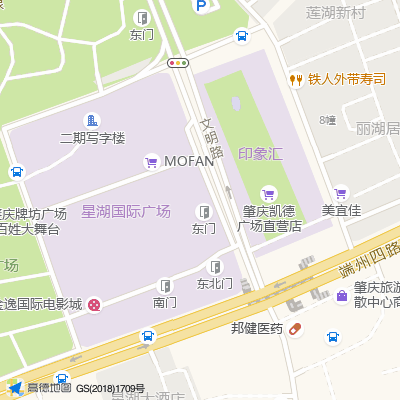

In [118]:
from PIL import Image #此库含图像类，读取图像内容
from io import BytesIO # 读取二进制内容
def jmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    """静态地图"""
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':CYY,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))# 图像打开方法：Image.open(file) ⇒ image 
    return data
jmap(location=大润发_location,zoom=16)

###  9.坐标转换

In [145]:
def change(locations,coordsys,sig=None):
    """坐标转换"""
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params = {
        'key': CYY,
        'locations': locations,
        'coordsys':coordsys,
        'sig':sig,
        'output': 'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
一中坐标 = change("112.470984,23.060107","gps")
一中坐标 
一中坐标2 = pd.DataFrame(一中坐标,index = [0])
一中坐标2

,status,info,infocode,locations
0,1,ok,10000,"112.476222601997,23.057475585938"


### 10. 天气查询

In [168]:
def weatherreport(city,extensions="all",):
    """天气查询"""
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params = {
        'key': CYY,
        'city': city,
        'extensions':extensions,
        'output': 'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
dz_weather = weatherreport("441202")
dz_weather
df_dzweather0 = json_normalize(dz_weather["forecasts"][0]["casts"][0])
df_dzweather1 = json_normalize(dz_weather["forecasts"][0]["casts"][1])
df_dzweather2 = json_normalize(dz_weather["forecasts"][0]["casts"][2])
df_dzweather3 = json_normalize(dz_weather["forecasts"][0]["casts"][3])
display(df_dzweather0,df_dzweather1,df_dzweather2,df_dzweather3)

,date,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-22,3,大雨,阵雨,22,17,无风向,无风向,≤3,≤3


,date,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-23,4,中雨,阵雨,20,14,无风向,无风向,≤3,≤3


,date,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-24,5,中雨,阵雨,18,14,无风向,无风向,≤3,≤3


,date,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-25,6,阵雨,阵雨,21,16,无风向,无风向,≤3,≤3


### 11.输入提示

In [185]:
def TIP(keywords,type,location,city,datatype,citylimit=None,sig=None,)->dict:
    """输入提示"""
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':CYY,
        'keywords':keywords,
        'type':type,
        'location':location,
        'city': city,
        'datatype':datatype,
        'citylimit':citylimit,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
tips0 = TIP("永和豆浆","050304","112.472820,23.056454","肇庆",datatype='all')
tips0
df_tips0 = json_normalize(tips0["tips"])
df_tips0
# 为啥都在东北啊

,id,name,district,adcode,location,address,typecode,city
0,[],永和豆浆,[],[],[],[],[],[]
1,B0FFJUPD1U,永和豆浆,吉林省四平市铁东区,220303,"124.431935,43.140548",东吉街与紫气大路交叉口东南150米,050304,[]
2,B0FFHWXNJM,永和豆浆(经开中海店),吉林省长春市南关区,220102,"125.364774,43.827316","临河街6971号,富奥花园B区东侧(近肯德基)",050304,[]
3,B0FFHIFYF3,笑一笑永和豆浆(美食城店),吉林省长春市宽城区,220103,"125.323551,43.912395",长白路1号长春站F2层,050304,[]
4,B0FFGNPT5J,永和豆浆(万达店),辽宁省抚顺市新抚区,210402,"123.902459,41.864478",浑河南路中段56号金街32号,050304,[]
5,B0FFHC9C21,福吉永和豆浆,辽宁省沈阳市康平县,210123,"123.354666,42.731651",中心街663号,050304,[]
6,B0FFK62IGR,永和豆浆(沈阳站),辽宁省沈阳市铁西区,210106,"123.392903,41.794514",胜利南街2号沈阳站F3层,050304,[]
7,B019E01QIW,永禧和豆浆(东芬店),辽宁省本溪市明山区,210504,"123.773298,41.312307",建业花园10栋3单元1-2层,050304,[]
8,B019E019GL,永和豆浆(银座店),辽宁省本溪市平山区,210502,"123.762474,41.291912",华联街与铁路街交叉口北50米,050304,[]
9,B0FFJ4AUEM,永和豆浆二部,辽宁省丹东市凤城市,210682,"124.076240,40.455306",苏苑路17-12号附近,050304,[]


### 12.交通态势

- 矩形区域交通态势

In [211]:
def traffic(name,adcode,city=None,level=None,extensions=None,sig=None)->dict:
    """查询交通态势"""
    url = 'https://restapi.amap.com/v3/traffic/status/road?parameters'
    params={
        'key':CYY,
        'level':level,
        'extensions':extensions,
        'name':name,
        'city':city,
        'adcode':adcode,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
Traffic = traffic("北环大道","440300")
df_raffic = json_normalize(Traffic)
df_raffic

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description
0,1,OK,10000,北环大道：双向畅通。,100.00%,0.00%,0.00%,0.00%,1,畅通


### 13.地理围栏

- 创建围栏

In [220]:
def creatfence(center,radius,valid_time,repeat,time,alert_condition,name=None,points=None,enable=None,fixed_date=None,desc=None,)->dict:
    """创建围栏"""
    url = 'https://restapi.amap.com/v4/geofence/meta?key=2bf18682847eba84262e9eb3242b82bf'
    params={
        "name": "一个围栏",
        "center": center,
        "radius": radius,
        "enable": enable,
        "valid_time":valid_time,
        "repeat": repeat,
        "time": time,
        "desc": "检测你是否进入了肇庆市",
        "alert_condition":alert_condition
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
Creat = creatfence("112.472529,23.051546","1000","2020-07-29","Mon,Tues,Wed,Thur,Fri,Sat,Sun","00:00,11:59;13:00,20:59","enter;leave")
Creat

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

- 查询围栏

In [224]:
def queryfence(name,id=None,gid=None,page_no=None,page_size=None,enable=None,start_time=None,end_time=None)->dict:
    """查询围栏"""
    url = 'https://restapi.amap.com/v4/geofence/meta?key=2bf18682847eba84262e9eb3242b82bf'
    params={
        "name": "一个围栏",
        "id":id,
        "gid":gid,
        "page_no":page_no,
        "page_size":page_size,
        "enable":enable,
        "start_time":start_time,
        "end_time":end_time
        
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
Query = queryfence("一个围栏")
Query

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 14. 轨迹纠偏

In [259]:
def correct(x=None,y=None,ag=None,tm=None,sp=None,)->dict:
    """纠错"""
    url = 'https://restapi.amap.com/v4/grasproad/driving'
    demon = [{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]

    params={
        "key":CYY,
        "param":demon
    }
    response = requests.post(url,params=params)
    data = response.json()
    return data
Correct = correct("116.449429","40.014844","4","110","1478831753")
Correct 

{'errcode': 20003,
 'errdetail': '未知错误，请联系高德地图开放平台技术支持',
 'errmsg': 'UNKNOWN_ERROR'}

### 3.在调用每一个功能的同时，思考其背后是否有ML,AI的功能（比如计算机视觉，语音识别，推荐算法等），并整理思考结果，在调用API代码模块中用md说明 

- 图像识别：静态地图
    - 通过对地图的图像识别为用户提供合适路线
- 机器学习功能：地理围栏
    - 通过输入的信息进行学习，来检测是否进入某个领域
- 智能搜索：输入提示
    - 输入关键词后为用户提供相关的提示
- 自动规划：路径规划
    - 用户输入路径信息后进行自动规划


### 4.尝试设计一个简单的应用，至少设计3个API功能（不要求写代码，只是写一个就行了）

#### 一个专门为旅游设计的APP。

1. 路径规划功能：输入自己所在的地点与目的地呈现出最多人选择的路径，可以展示出不同路径不同的景点。
2. 静态地图功能：输入目的地，或者自己所在的位置给出所在地图，并且标出周围最醒目的地标。
3. 输入提示功能：在游客输入目的地后列出相关的关键词，比如输入景点列出周边美食住宿玩乐；输入一个周边美食住宿玩乐列出相关景点